<a href="https://colab.research.google.com/github/rohtheroos-84/autoplot/blob/main/ml_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style", "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type","num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
df = pd.read_csv(filename, names=headers)

In [4]:
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [5]:
df.replace('?', np.nan, inplace=True)
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [6]:
print("Missing values per column:")
print(df.isnull().sum())

print(f"\nTotal missing values in the entire DataFrame: {df.isnull().sum().sum()}")

mean_norm_losses = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, mean_norm_losses, inplace=True)

mean_bore = df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, mean_bore, inplace=True)

mean_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, mean_stroke, inplace=True)

mean_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, mean_horsepower, inplace=True)

mean_peak_rpm = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, mean_peak_rpm, inplace=True)

mode_num_doors = df['num-of-doors'].mode()[0]
df['num-of-doors'].replace(np.nan, mode_num_doors, inplace=True)

df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values per column:
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Total missing values in the entire DataFrame: 59

Missing values after cleaning:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
w

/tmp/ipython-input-6-2116380171.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].replace(np.nan, mean_norm_losses, inplace=True)
/tmp/ipython-input-6-2116380171.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [7]:
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['normalized-losses'] = df['normalized-losses'].astype(int)
df['price'] = df['price'].astype(float)
df['peak-rpm'] = df['peak-rpm'].astype(float)
df['horsepower'] = df['horsepower'].astype(int)

print("\nFinal data types of columns:")
print(df.dtypes)


Final data types of columns:
symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


In [8]:
df['city-L/100km'] = 235 / df['city-mpg']

df['highway-L/100km'] = 235 / df['highway-mpg']

print(df[['city-mpg', 'city-L/100km', 'highway-mpg', 'highway-L/100km']].head(10))

   city-mpg  city-L/100km  highway-mpg  highway-L/100km
0        21     11.190476           27         8.703704
1        21     11.190476           27         8.703704
2        19     12.368421           26         9.038462
3        24      9.791667           30         7.833333
4        18     13.055556           22        10.681818
5        19     12.368421           25         9.400000
6        19     12.368421           25         9.400000
7        19     12.368421           25         9.400000
8        17     13.823529           20        11.750000
9        23     10.217391           29         8.103448


In [9]:
for col in ['length', 'width', 'height']:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

print(df[['length', 'width', 'height']].head())

     length     width    height
0  0.413433  0.324786  0.083333
1  0.413433  0.324786  0.083333
2  0.449254  0.444444  0.383333
3  0.529851  0.504274  0.541667
4  0.529851  0.521368  0.541667


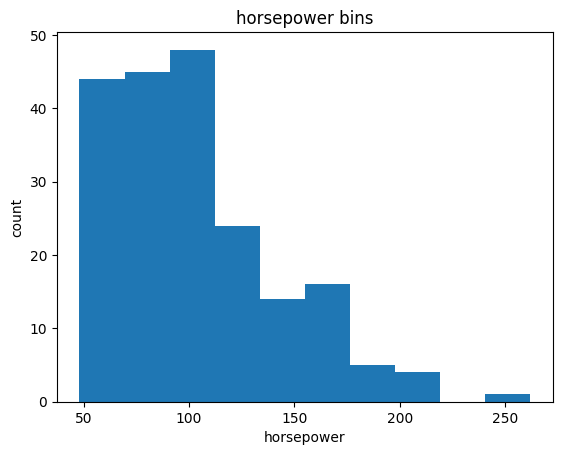


Bin dividers: [ 48.         119.33333333 190.66666667 262.        ]

Horsepower and Binned Horsepower:
   horsepower horsepower-binned
0         111               Low
1         111               Low
2         154            Medium
3         102               Low
4         115               Low
5         110               Low
6         110               Low
7         110               Low
8         140            Medium
9         101               Low

Vehicle count in each horsepower bin:
horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64


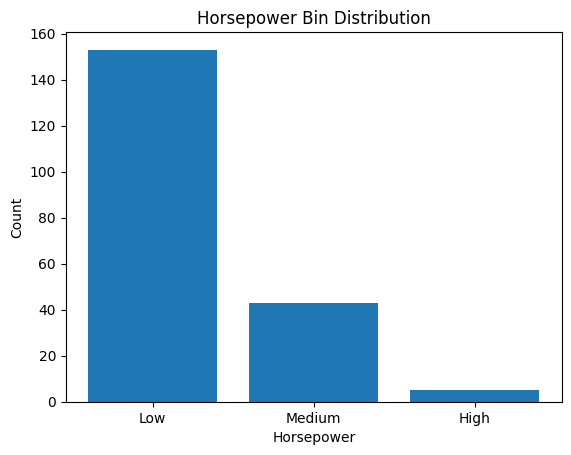

In [10]:
plt.hist(df["horsepower"])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
print("\nBin dividers:", bins)

group_names = ['Low', 'Medium', 'High']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)

print("\nHorsepower and Binned Horsepower:")
print(df[['horsepower', 'horsepower-binned']].head(10))

print("\nVehicle count in each horsepower bin:")
print(df['horsepower-binned'].value_counts())

plt.bar(group_names, df["horsepower-binned"].value_counts())
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bin Distribution")
plt.show()

In [11]:
dummy_fuel = pd.get_dummies(df['fuel-type'])
dummy_fuel.rename(columns={'gas': 'fuel-type-gas', 'diesel': 'fuel-type-diesel'}, inplace=True)

dummy_aspiration = pd.get_dummies(df['aspiration'])
dummy_aspiration.rename(columns={'std': 'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

df = pd.concat([df, dummy_fuel, dummy_aspiration], axis=1)

df.drop(['fuel-type', 'aspiration'], axis=1, inplace=True)

print(df.head())

   symboling  normalized-losses         make num-of-doors   body-style  \
0          3                122  alfa-romero          two  convertible   
1          3                122  alfa-romero          two  convertible   
2          1                122  alfa-romero          two    hatchback   
3          2                164         audi         four        sedan   
4          2                164         audi         four        sedan   

  drive-wheels engine-location  wheel-base    length     width  ...  city-mpg  \
0          rwd           front        88.6  0.413433  0.324786  ...        21   
1          rwd           front        88.6  0.413433  0.324786  ...        21   
2          rwd           front        94.5  0.449254  0.444444  ...        19   
3          fwd           front        99.8  0.529851  0.504274  ...        24   
4          4wd           front        99.4  0.529851  0.521368  ...        18   

   highway-mpg    price city-L/100km  highway-L/100km horsepower-bin

In [12]:
df.to_csv('auto_clean.csv', index=False)
print("\nCleaned DataFrame saved to auto_clean.csv")


Cleaned DataFrame saved to auto_clean.csv


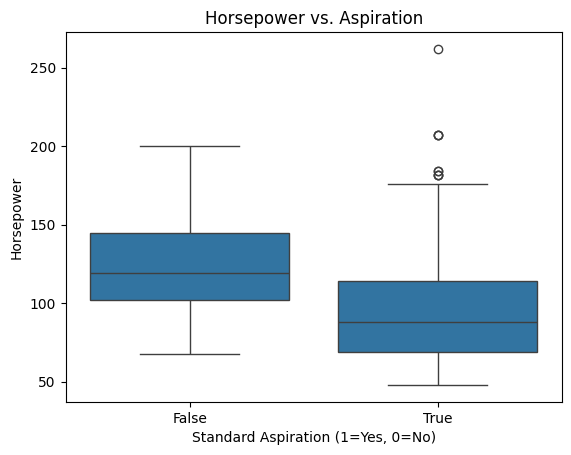

In [13]:
sns.boxplot(x="aspiration-std", y="horsepower", data=df)
plt.title("Horsepower vs. Aspiration")
plt.xlabel("Standard Aspiration (1=Yes, 0=No)")
plt.ylabel("Horsepower")
plt.show()

In [14]:
temp_df = pd.read_csv(filename, names=headers)
print("Vehicle count by fuel type:")
print(temp_df['fuel-type'].value_counts())

Vehicle count by fuel type:
fuel-type
gas       185
diesel     20
Name: count, dtype: int64


In [15]:
avg_price_by_make = df.groupby('make')['price'].mean().sort_values(ascending=False)

print("Average price for each car make (sorted highest to lowest):")
print(avg_price_by_make)

Average price for each car make (sorted highest to lowest):
make
jaguar           34600.000000
mercedes-benz    33647.000000
porsche          31400.500000
bmw              26118.750000
volvo            18063.181818
audi             17859.166667
mercury          16503.000000
alfa-romero      15498.333333
peugot           15489.090909
saab             15223.333333
mazda            10652.882353
nissan           10415.666667
volkswagen       10077.500000
toyota            9885.812500
renault           9595.000000
mitsubishi        9239.769231
isuzu             8916.500000
subaru            8541.250000
honda             8184.692308
plymouth          7963.428571
dodge             7875.444444
chevrolet         6007.000000
Name: price, dtype: float64


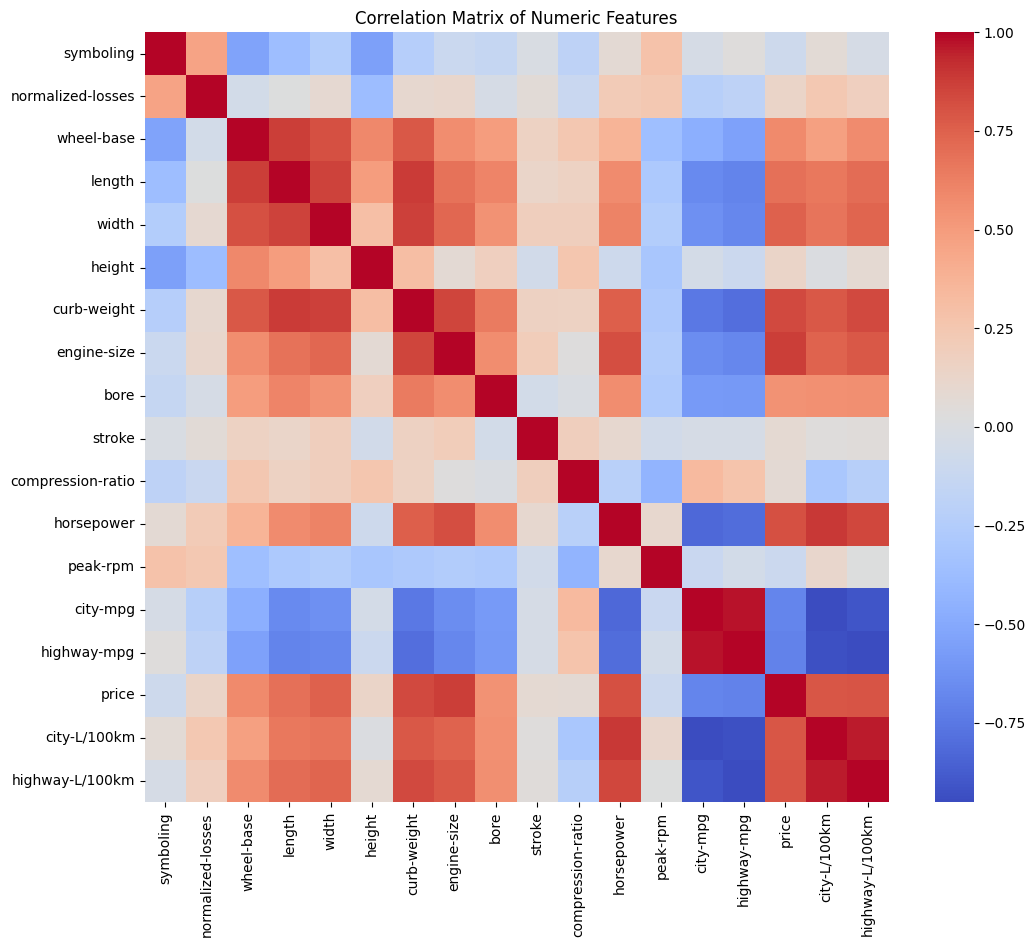


Top 3 Features Most Correlated with Price:
engine-size    0.872335
curb-weight    0.834415
horsepower     0.809607
Name: price, dtype: float64


In [16]:
numeric_cols = df.select_dtypes(include=np.number)

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

price_corr = corr_matrix['price'].sort_values(ascending=False)
print("\nTop 3 Features Most Correlated with Price:")
print(price_corr[1:4])

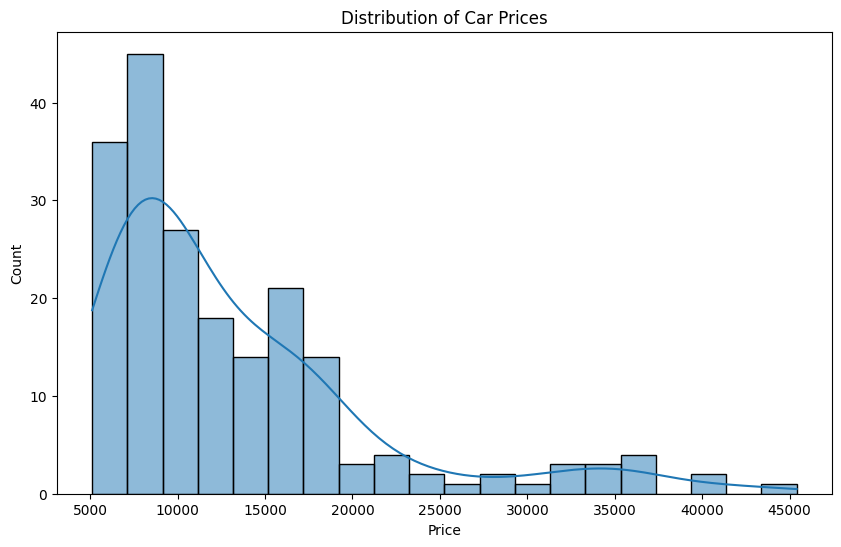

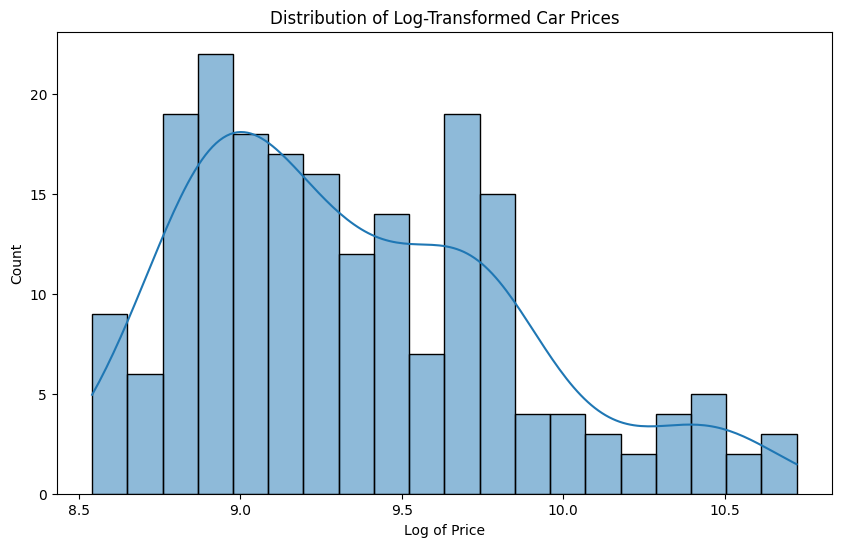

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log(df['price']), bins=20, kde=True)
plt.title('Distribution of Log-Transformed Car Prices')
plt.xlabel('Log of Price')
plt.ylabel('Count')
plt.show()

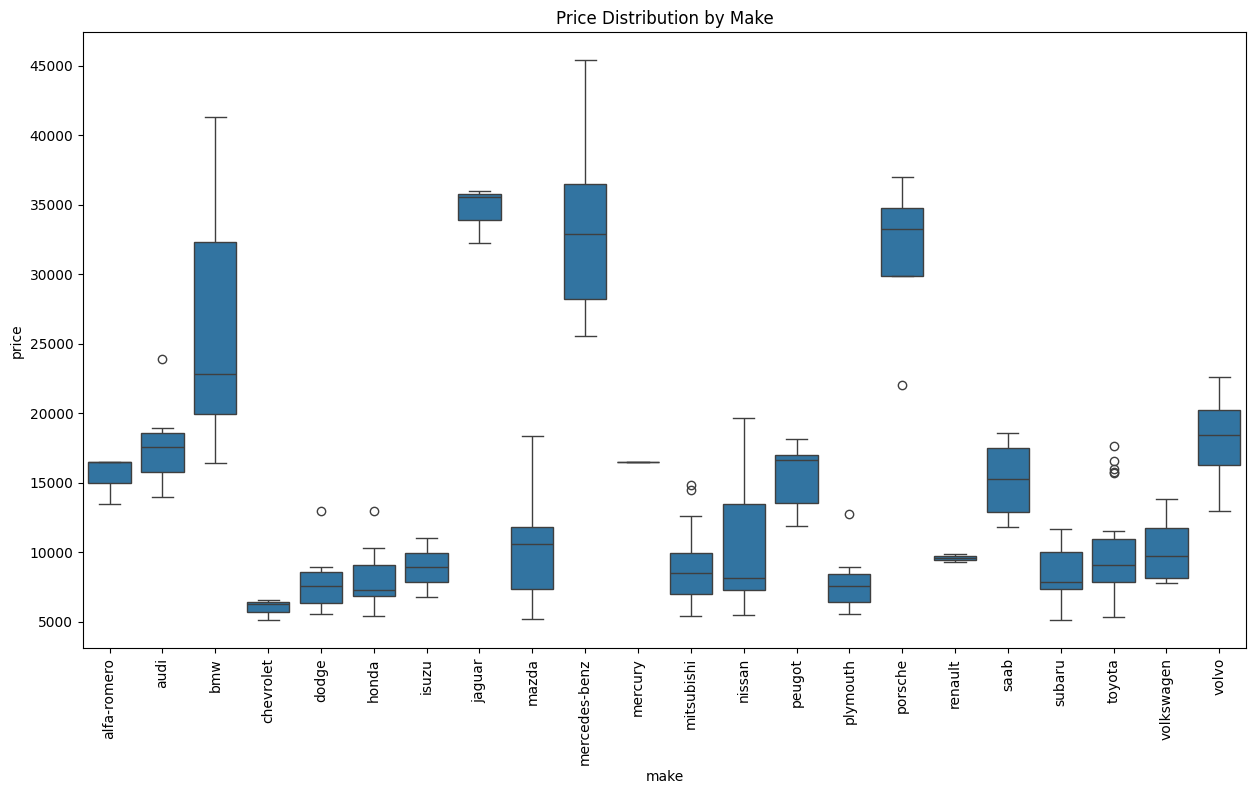

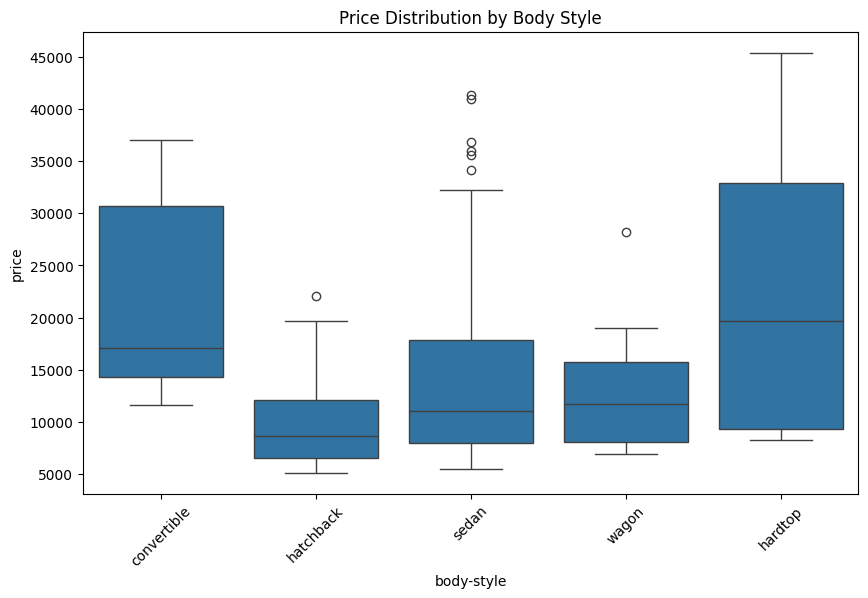

In [18]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='make', y='price', data=df)
plt.title('Price Distribution by Make')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='body-style', y='price', data=df)
plt.title('Price Distribution by Body Style')
plt.xticks(rotation=45)
plt.show()

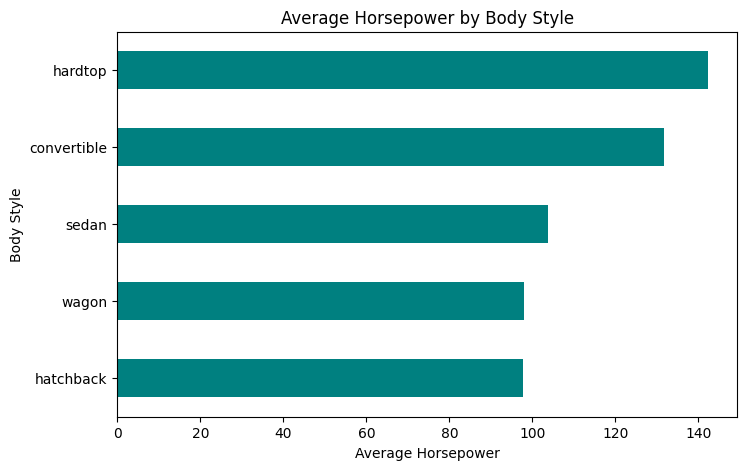

In [19]:
avg_hp_by_style = df.groupby('body-style')['horsepower'].mean().sort_values()
plt.figure(figsize=(8, 5))
avg_hp_by_style.plot(kind='barh', color='teal')
plt.title('Average Horsepower by Body Style')
plt.xlabel('Average Horsepower')
plt.ylabel('Body Style')
plt.show()

/tmp/ipython-input-20-1699486212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='make', data=df, order=df['make'].value_counts().index, palette='viridis')


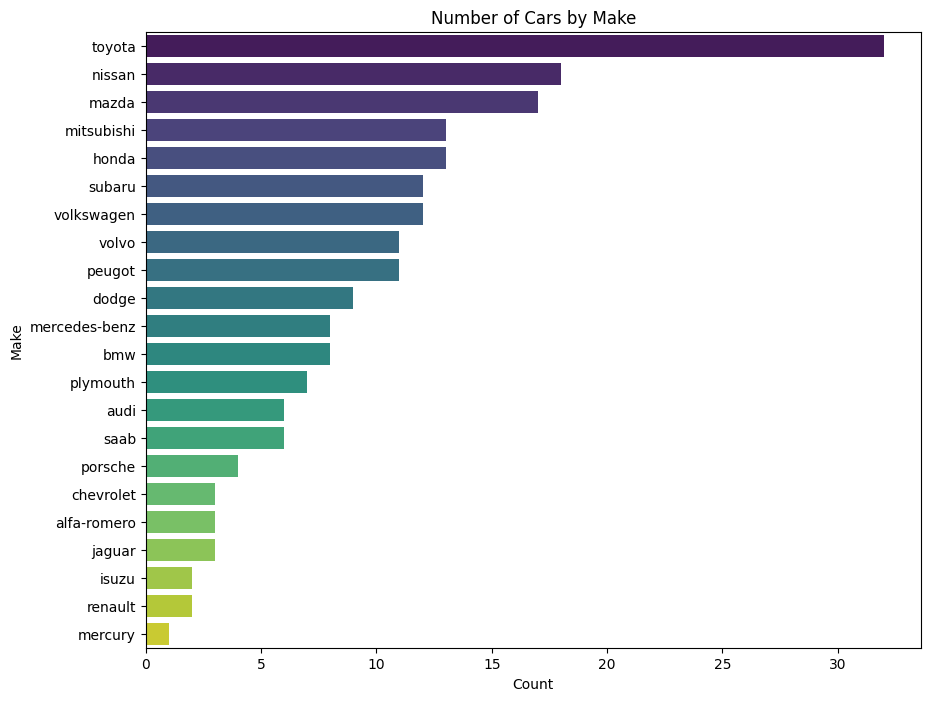

In [20]:
plt.figure(figsize=(10, 8))
sns.countplot(y='make', data=df, order=df['make'].value_counts().index, palette='viridis')
plt.title('Number of Cars by Make')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

In [21]:
df['mpg-difference'] = df['highway-mpg'] - df['city-mpg']

print(df[['city-mpg', 'highway-mpg', 'mpg-difference']].head())

   city-mpg  highway-mpg  mpg-difference
0        21           27               6
1        21           27               6
2        19           26               7
3        24           30               6
4        18           22               4


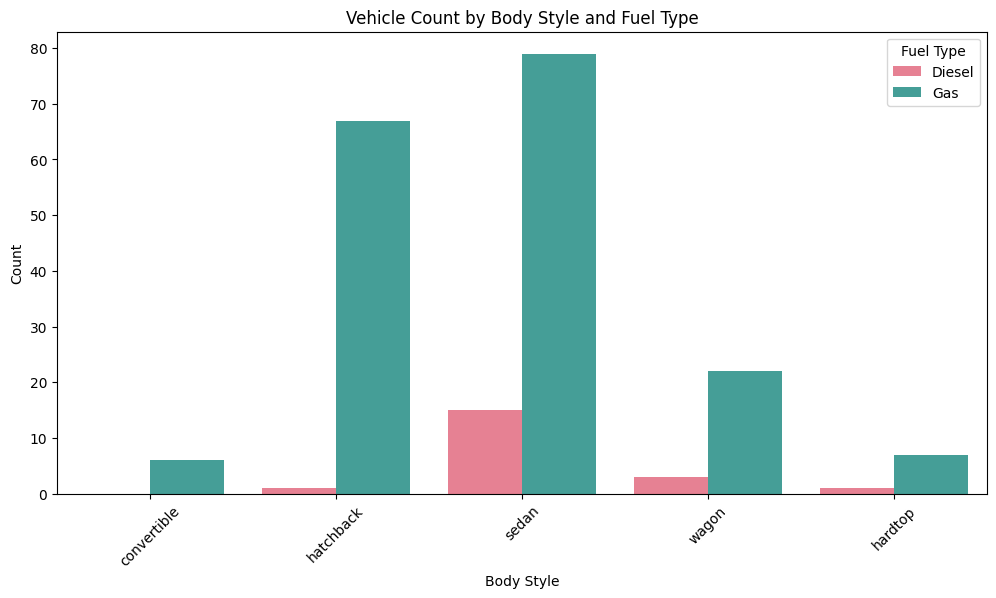

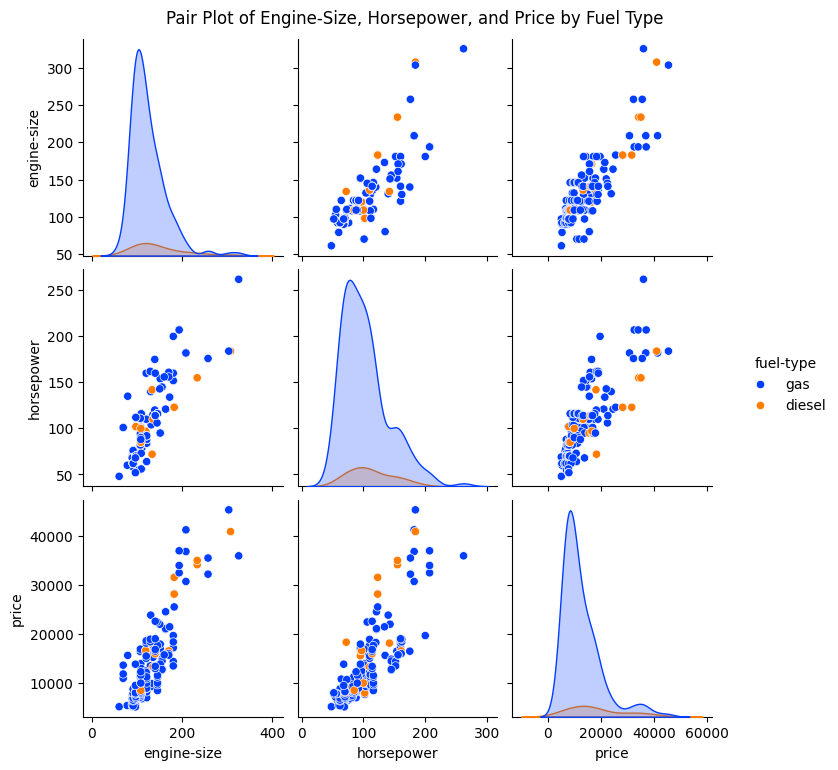

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='body-style', hue='fuel-type-gas', data=df, palette='husl')
plt.title('Vehicle Count by Body Style and Fuel Type')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type', labels=['Diesel', 'Gas'])
plt.show()

df_for_plot = df.join(temp_df['fuel-type'])
sns.pairplot(df_for_plot, vars=['engine-size', 'horsepower', 'price'], hue='fuel-type', palette='bright')
plt.suptitle('Pair Plot of Engine-Size, Horsepower, and Price by Fuel Type', y=1.02)
plt.show()